# Project 1: Random Graphs and Random Walks

## Question 1:
Create random networks using Erdo ̈s-R ́enyi (ER) model

1. Create undirected random networks with n = 1000 nodes, and the probability p for drawing an edge between two arbitrary vertices 0.003, 0.004, 0.01, 0.05, and 0.1. Plot the degree distributions. What distribution is observed? Explain why. Also, report the mean and variance of the degree distributions and compare them to the theoretical values.

In [4]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")

g1 = sample_gnp(n=1000, p=0.003, directed=F)
g2 = sample_gnp(n=1000, p=0.004, directed=F)
g3 = sample_gnp(n=1000, p=0.01, directed=F)
g4 = sample_gnp(n=1000, p=0.05, directed=F)
g5 = sample_gnp(n=1000, p=0.1, directed=F)

Mean is: 3.112 
Variance is: 3.168625 


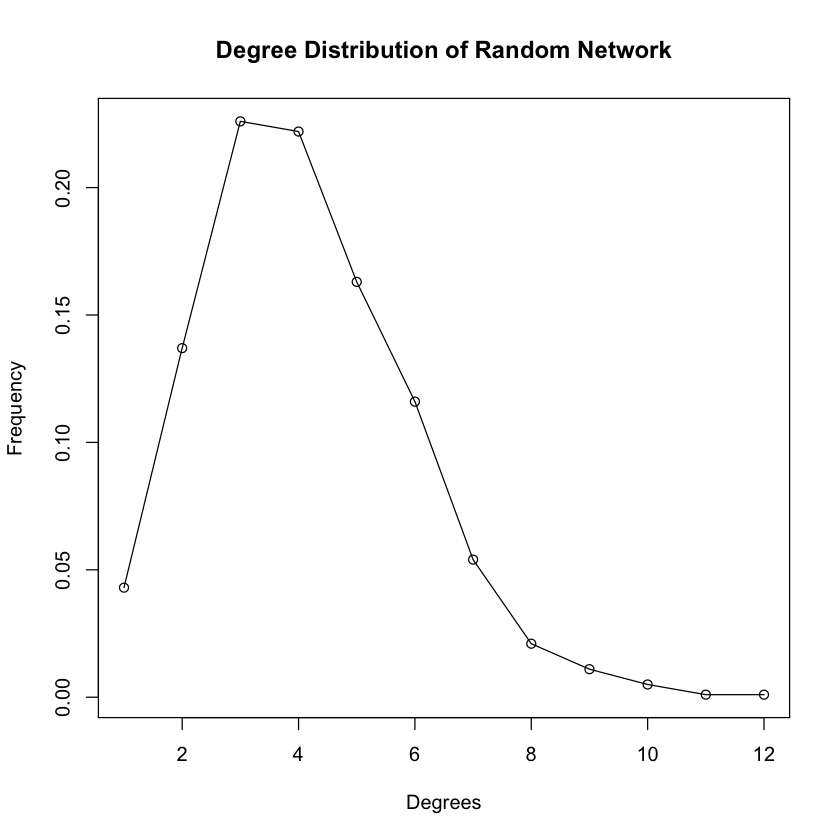

Mean is: 4.11 
Variance is: 3.993894 


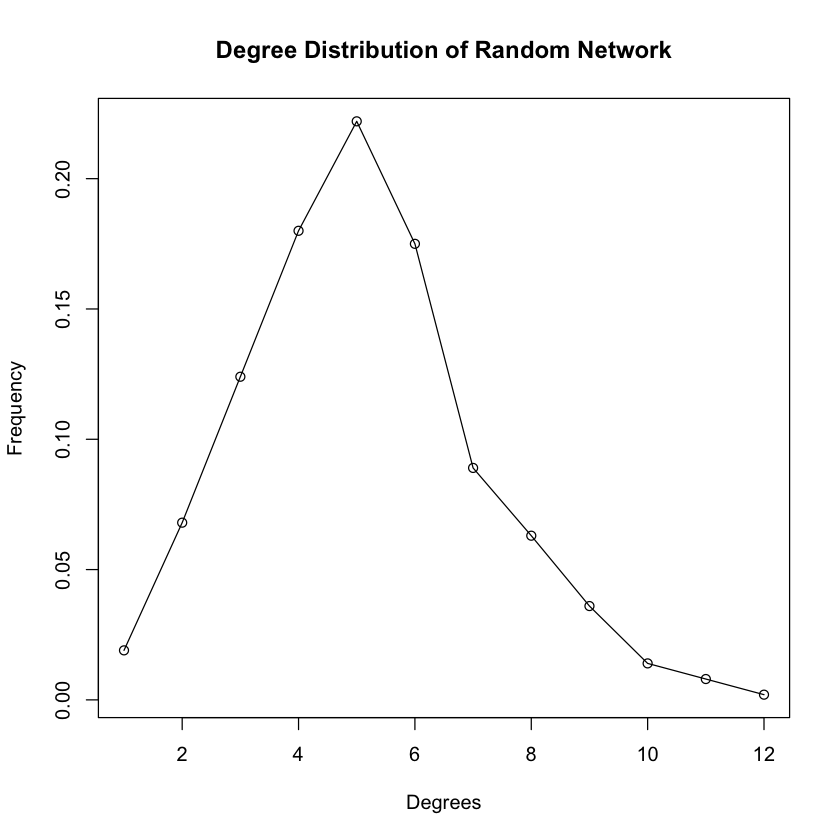

Mean is: 10.086 
Variance is: 10.12873 


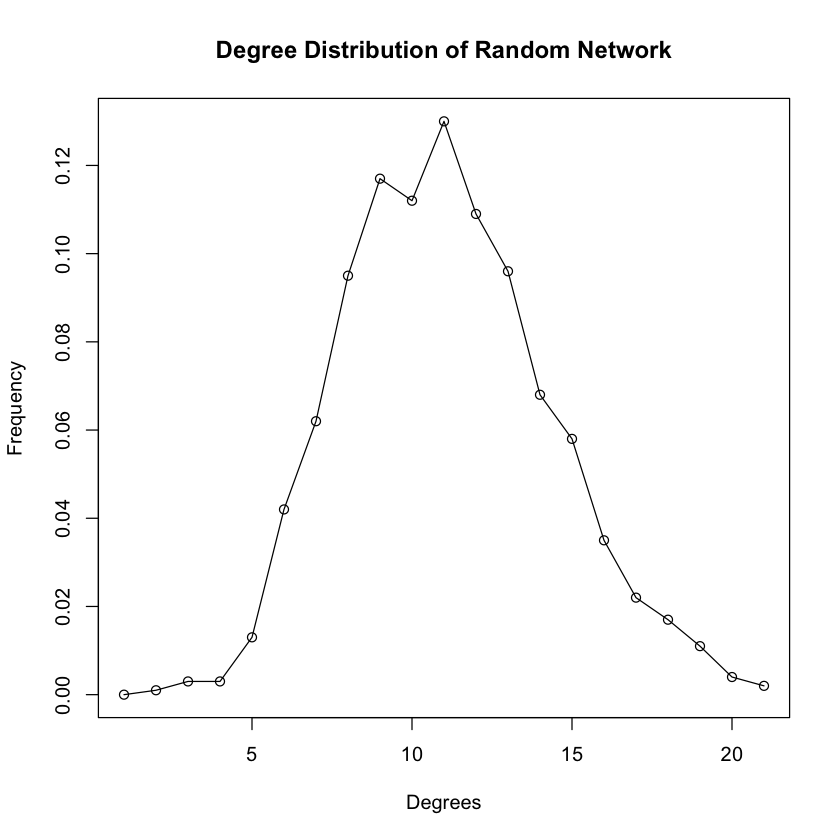

Mean is: 50.284 
Variance is: 45.97332 


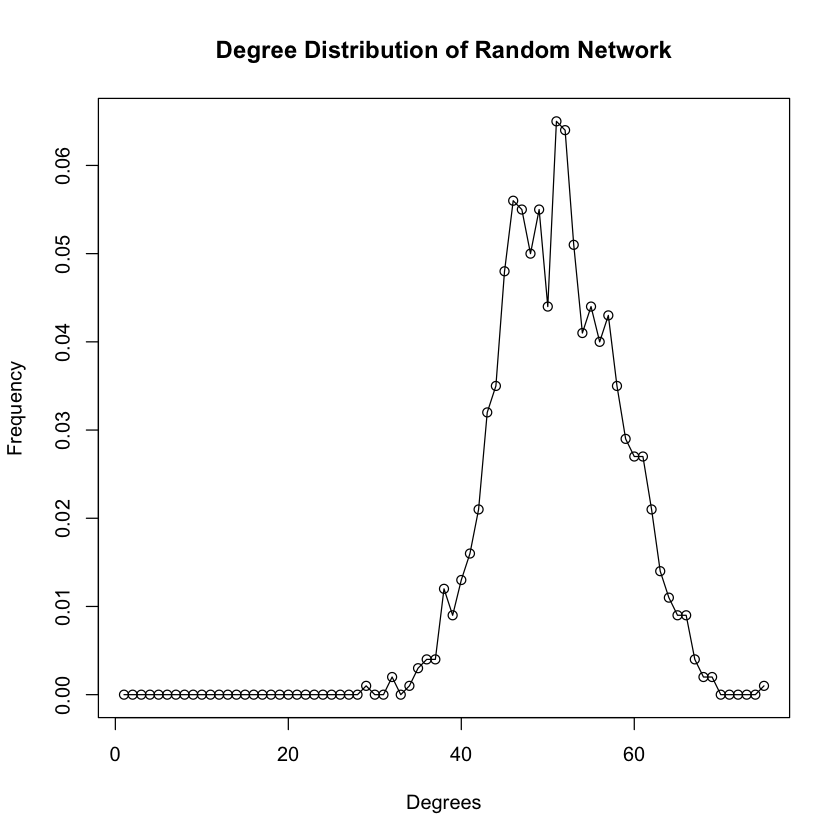

Mean is: 99.47 
Variance is: 80.56366 


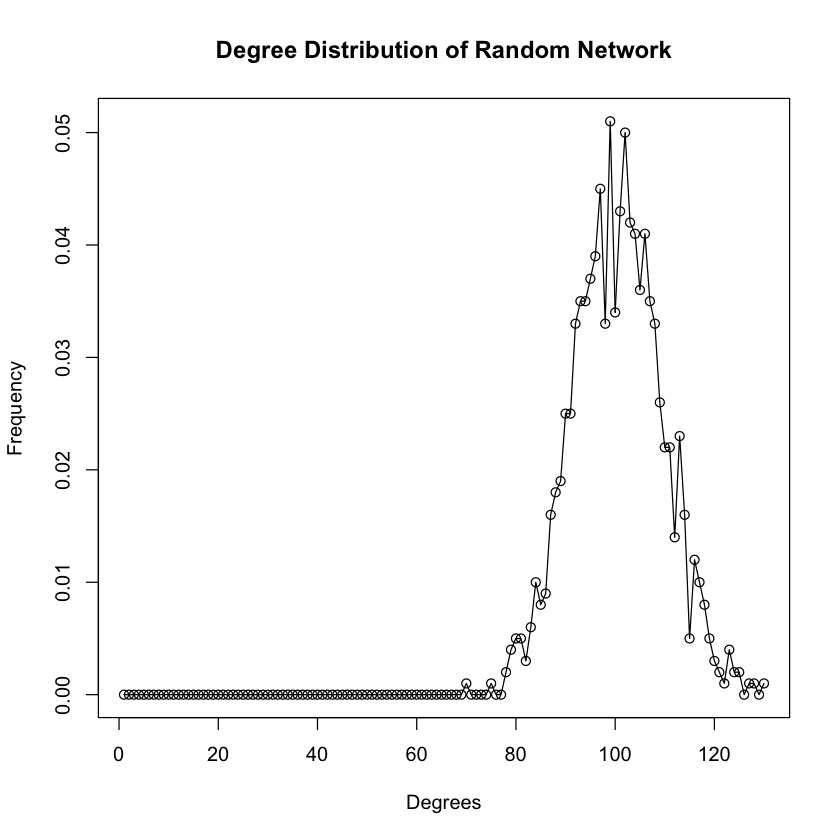

In [14]:
# show the degree distribution and get mean and variance
for (g in list(g1, g2, g3, g4, g5)){
    plot(degree_distribution(g), main = 'Degree Distribution of Random Network', 
         xlab = 'Degrees', ylab = 'Frequency')
    lines(degree_distribution(g))
    cat("Mean is:", mean(degree(g)),"\n", sep=" ")
    cat("Variance is:", var(degree(g)),"\n", sep=" ")
}

2. For each p and n = 1000, answer the following questions: <br>
Are all random realizations of the ER network connected? Numerically estimate the probability that a generated network is connected. For one instance of the networks with that p, find the giant connected component (GCC) if not connected. What is the diameter of the GCC?

-------------------- g1 --------------------
P of the graph is: 0.003 
Is connected? FALSE 
The diameter of the gcc is: 15 
The total diameter of the graph is: 15 
-------------------- g2 --------------------
P of the graph is: 0.004 
Is connected? FALSE 
The diameter of the gcc is: 11 


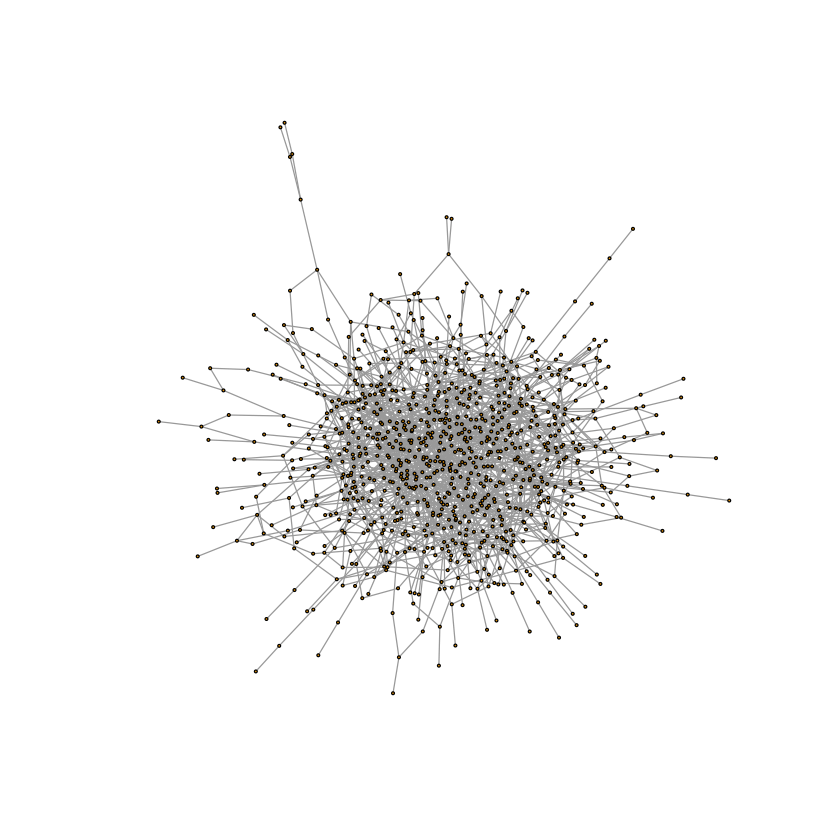

The total diameter of the graph is: 11 
-------------------- g3 --------------------
P of the graph is: 0.01 
Is connected? TRUE 
The total diameter of the graph is: 6 
-------------------- g4 --------------------
P of the graph is: 0.05 
Is connected? TRUE 
The total diameter of the graph is: 3 
-------------------- g5 --------------------
P of the graph is: 0.1 
Is connected? TRUE 
The total diameter of the graph is: 3 


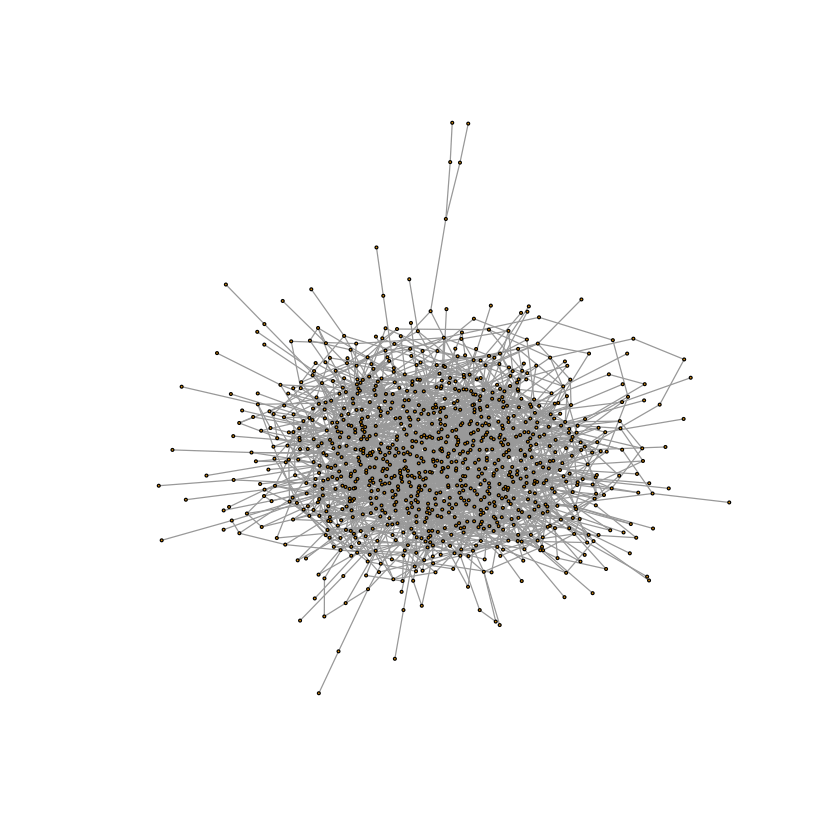

In [24]:
i <- 0
for (g in list(g1, g2, g3, g4, g5)){
    i <- i+1
    cat('-------------------- ', 'g', i, ' --------------------', '\n', sep="")
    cat('P of the graph is:', g$p, '\n', sep=" ")
    cat('Is connected?', is_connected(g), '\n', sep=" ")
    if (!is_connected(g)){
        g.components <- clusters(g)
        idx <- which.max(g.components$csize)
        gcc <- induced.subgraph(g, which(g.components$membership == idx))
        cat('The diameter of the gcc is:', diameter(gcc), '\n', sep=" ")
        plot(gcc, vertex.size=1, vertex.label=NA)
    }
    cat('The total diameter of the graph is:', diameter(g), '\n')
}

3. It turns out that the normalized GCC size (i.e., the size of the GCC as a fraction of the total network size) is a highly nonlinear function of p, with interesting properties occurring for values where $p = O(\frac{1}{n})$ and $p = O(\frac{ln(n)}{n})$. For n = 1000, sweep over values of p from 0 to a pmax that makes the network almost surely connected and create 100 random networks for each p. pmax should be roughly determined by yourself. Then scatter plot the normalized GCC sizes vs p. Plot a line of the average normalized GCC sizes for each p along with the scatter plot.
    - Empirically estimate the value of p where a giant connected component starts to emerge (define your criterion of “emergence”)? Do they match with theoretical values mentioned or derived in lectures?
    - Empirically estimate the value of p where the giant connected component takes up over 99% of the nodes in almost every experiment.